<a href="https://colab.research.google.com/github/Ritika0919/American-food-dataset/blob/main/BeerDataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries 


In [1]:
#import data visualization and manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

## Load Excel file

In [2]:
#Provide Google authentication to import file from Google Drive

!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
#Create and authenticate the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
#import file from Google drive

link = 'https://drive.google.com/file/d/1E1JoajwM2FZY4wPhKm-uUThbfkqGzLZW/view'
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('BeerDataScienceProject.csv') 
 

In [4]:
#Load dataset as an excel file

df = pd.read_csv('BeerDataScienceProject.csv',encoding='latin-1')


## Learning about the dataset


In [5]:
df.head(5)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [6]:
df.tail(5)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
528865,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,3.5,orangemoustache,4.0,"A-pours a reddish amber that looks very nice,l...",1205212721
528866,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.5,3.0,3.0,MisterStout,3.0,I don't really have anything special to say ab...,1203490783
528867,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.5,4.0,meechum,4.5,Had this on tap at Vreny's Beirgarten A - Came...,1201320897
528868,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",1201215290
528869,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.0,4.0,jenbys2001,4.0,"I ordered a mug of this beer at Schnitzelhaus,...",1200336367


In [7]:
#resetting index
df = df.reset_index()

In [8]:
#Data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               528870 non-null  int64  
 1   beer_ABV            508590 non-null  float64
 2   beer_beerId         528870 non-null  int64  
 3   beer_brewerId       528870 non-null  int64  
 4   beer_name           528870 non-null  object 
 5   beer_style          528870 non-null  object 
 6   review_appearance   528870 non-null  float64
 7   review_palette      528870 non-null  float64
 8   review_overall      528870 non-null  float64
 9   review_taste        528870 non-null  float64
 10  review_profileName  528755 non-null  object 
 11  review_aroma        528870 non-null  float64
 12  review_text         528751 non-null  object 
 13  review_time         528870 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 56.5+ MB


As expected, this ratings dataset has most of its values in numerical form (int or float). The review_time column needs to be reset to a datetime format.

In [9]:
#Initial size of dataset
df.shape

(528870, 14)

In [10]:
# total number of missing values per column
df.isnull().sum()

index                     0
beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

This is a good dataset. Only 3 of the 13 columns have missing values. Of those 3 columns, 2 have a small percentage of missing values that can be dropped, without significantly affecting the quality of the dataset.

## Cleaning the dataset

In [11]:
#dropping the missing values
df = df.dropna()

20,514 missing values have been dropped

In [12]:
#Checking for duplicate values in the dataframe
duplicate_vals = df.duplicated()
duplicate_vals

0         False
1         False
2         False
3         False
4         False
          ...  
528792    False
528793    False
528794    False
528795    False
528796    False
Length: 508358, dtype: bool

In [13]:
# Dropping the beers with 0 rating since the scale goes from 1 to 5
df = df[(df['review_overall'] >= 1)]

In [14]:
#arrange the review scores in descending order
df = df.sort_values('review_overall', ascending=False)
df

,index,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
152866,152866,9.5,28577,3818,Unearthly (Imperial India Pale Ale),American Double / Imperial IPA,4.5,4.0,5.0,4.5,ken2cart1,4.0,22 oz bomber served in my 8 ounce flute glass ...,1243562965
370806,370806,10.0,28385,22,Unibroue 15,Belgian Strong Pale Ale,4.0,4.0,5.0,4.5,Gehrig,4.5,I grabbed this at the terrific Neil St. Piccad...,1206337414
412412,412412,6.0,11547,73,Great Lakes Independence Ale,American Amber / Red Ale,4.0,4.0,5.0,4.0,sliverX,5.0,Poured from a growler a clear copper brew with...,1278717598
79616,79616,5.6,279,140,Sierra Nevada Porter,American Porter,4.5,4.5,5.0,4.5,pbrian,5.0,I love this beer. It has that signature Sierra...,1014202494
46458,46458,4.4,429,1,Pilsner Urquell,Czech Pilsener,4.5,4.0,5.0,4.5,schusterbauer,4.5,i seem to remember not being so impressed by t...,1174915272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378970,378970,5.0,8817,1435,Tuborg Premium Lager (Gold / Guld),Euro Pale Lager,1.0,1.0,1.0,1.0,EagleTalon,1.0,Pours to wimpy yellow-gold color and thin but ...,1079755752
255224,255224,5.0,10331,1141,Route Des Épices (Ale Rousse Au Poivre),Rye Beer,4.0,3.0,1.0,3.0,cratez,2.0,341ml bottle from the Richmond & Fanshawe LCBO...,1283401794
255309,255309,5.0,10331,1141,Route Des Épices (Ale Rousse Au Poivre),Rye Beer,3.0,2.0,1.0,3.0,KarlHungus,2.0,This beer pours a hazy amber color. The head i...,1248634334
255318,255318,5.0,10331,1141,Route Des Épices (Ale Rousse Au Poivre),Rye Beer,3.5,3.5,1.0,2.5,MrRetardedMonkey,1.0,I've pretty much loved or at least enjoyed eve...,1247427466


As we can see, there are some common beer_beerIds in the dataset, which implies that the same reviewer has reviewed the same thing twice. Let's retain the first rating in these cases (for fairness).

In [15]:
df = df.drop_duplicates(subset= ['review_profileName','beer_beerId'], keep='first')

In [16]:
df.shape

(503697, 14)

After cleaning the data, we have 503697 rows and 14 columns


## Questions and answers


#### 1. Top 3 breweries that produce the strongest beers

To do this, I use the array top_breweries to store the beer_name, beer_ABV, beer_brewerId,beer_beerId columns. Then, I group this by brewer_Id and beer_Id  to find the average percentage of alcohol in most beers.

In [17]:
top_breweries = df[['beer_name','beer_ABV','beer_brewerId' ,'beer_beerId']]
top_breweries.head(5)

,beer_name,beer_ABV,beer_brewerId,beer_beerId
152866,Unearthly (Imperial India Pale Ale),9.5,3818,28577
370806,Unibroue 15,10.0,22,28385
412412,Great Lakes Independence Ale,6.0,73,11547
79616,Sierra Nevada Porter,5.6,140,279
46458,Pilsner Urquell,4.4,1,429


In [18]:
#Grouping by brewerId and beerId for every beer alcohol percentage
brewer_beer = top_breweries.groupby(['beer_brewerId', 'beer_beerId']).agg({'beer_ABV': [np.size, np.mean]})

#Grouping by brewerId for every brewery
brewer = brewer_beer.groupby(level='beer_brewerId').mean()
brewer.columns = ('Avg_num_beers', 'Brewer_beer_ABV')

In [19]:
brewer_beer.head(10)

beer_ABV     
                              size mean
beer_brewerId beer_beerId              
1             429             1220  4.4
              5916              46  5.0
              14348              6  5.0
              19099              4  4.2
              19123              7  4.1
              19274              2  5.0
              41294              4  3.5
              49865              4  4.7
              51248              5  4.4
              51575              8  4.1

We see that brewerId 1 makes 1220 cans of beerId 429. It is the brewer's most popular beer.


In [20]:
brewer.head(10)

,Avg_num_beers,Brewer_beer_ABV
beer_brewerId,,
1,101.538462,4.876923
3,123.425000,6.237500
5,69.000000,4.837500
10,14.000000,4.625000
14,8.983871,6.588710
22,322.139535,7.309302
31,94.250000,4.800000
35,397.175258,7.641443
36,31.400000,7.520000


In [21]:
# Ordering breweries by the avg_num_beers in descending order, to find the 3 breweries that make the beers with the highest ABV
best_beer = brewer.drop('Avg_num_beers', 1).sort_values('Brewer_beer_ABV', ascending=False).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


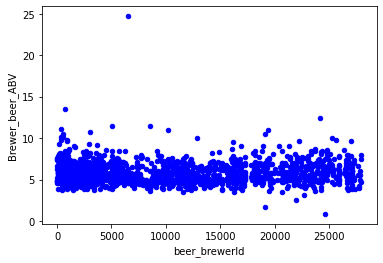

In [22]:
best_beer.plot(kind='scatter',x='beer_brewerId',y='Brewer_beer_ABV',color='blue')
plt.show()

We see that most of the breweries create beers containing between 4% and 8% alcohol. One brewery in particular makes a beer with 25% alcohol content and a few breweries make beers with less than 4% alcohol content.

#### 2. Which year did beers enjoy the highest ratings?

Now, we take the beer_name,beerId, review and review_time to find the beers with the highest ratings over the years. I extract the year from the review_time column. Group the beers rates by years and then arrange the dataset in descending order to find the year with the best rated beers.

In [23]:
beer_ratings = df[['beer_name','beer_beerId','review_overall','review_time']]

In [24]:
#splitting year from review_time
beer_ratings['review_year'] = beer_ratings.apply(lambda row: datetime.utcfromtimestamp(row.review_time).strftime("%Y"), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
beer_ratings['review_year']

152866    2009
370806    2008
412412    2010
79616     2002
46458     2007
          ... 
378970    2004
255224    2010
255309    2009
255318    2009
346708    2008
Name: review_year, Length: 503697, dtype: object

In [26]:
beer_ratings= beer_ratings.reset_index(drop=True)
beer_ratings.head()

,beer_name,beer_beerId,review_overall,review_time,review_year
0,Unearthly (Imperial India Pale Ale),28577,5.0,1243562965,2009
1,Unibroue 15,28385,5.0,1206337414,2008
2,Great Lakes Independence Ale,11547,5.0,1278717598,2010
3,Sierra Nevada Porter,279,5.0,1014202494,2002
4,Pilsner Urquell,429,5.0,1174915272,2007


In [27]:
#Grouping beer ratings by the year of review and all the reviews for this by the year
mean_beer_rating =beer_ratings.groupby(['review_year'], as_index=False)['review_overall'].agg('mean')

In [28]:
#arranging beer by mean rating and overall reviews to find the best rated beers
mean_beer_rating = mean_beer_rating.sort_values(by=['review_overall'], ascending=False)

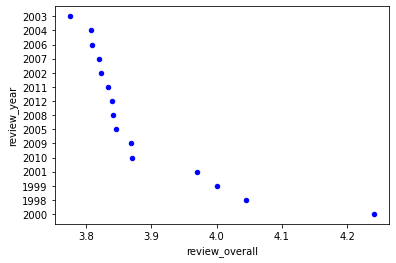

In [29]:
mean_beer_rating.plot(kind='scatter',x='review_overall',y='review_year',color='blue')

The highest rated beers were between 1999 and 2001. 2000 has the highest rated beers. Between 2002 and 2012, none of the beers have rated below 3.5 and above 4.0

#### 3. Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

I take the beerId, appearance, taste, pallette, aroma and overall rating to find which of these parameters are the most important to the user. I will use a correlation plot to find how important the correlation between each parameter is.

In [30]:
factors = df[[ 'review_taste','review_appearance', 'review_aroma', 'review_palette','review_overall','beer_beerId']]

In [31]:
#define the dataset for the correlation plot
corrfactors = factors.groupby('beer_beerId').agg({'beer_beerId':'count', 'review_palette':'mean','review_appearance':'mean','review_taste':'mean','review_aroma':'mean','review_overall':'mean'})

In [32]:
#columns for correlation plot
corrfactors.columns = ('Beer_Ids','Pallette_score','Appearance_score','Taste_score','Aroma_score','Overall_score')

In [33]:
corrfactors.head()

,Beer_Ids,Pallette_score,Appearance_score,Taste_score,Aroma_score,Overall_score
beer_beerId,,,,,,
5,420,3.208333,3.488095,3.323810,3.342857,3.554762
6,871,3.516073,3.838691,3.514925,3.645235,3.709529
7,655,3.178626,3.251145,3.110687,3.103817,3.271756
8,68,3.080882,3.294118,3.301471,3.235294,3.647059
9,116,2.853448,3.051724,3.103448,3.043103,3.400862


In [34]:
corr = corrfactors.corr()

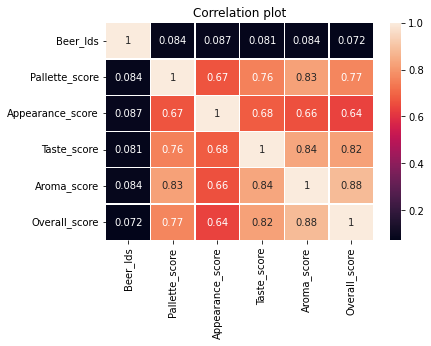

In [35]:
# Heatmap
sns.heatmap(corr, annot=True, linewidths=.3)

plt.title("Correlation plot")
plt.show()

Pallette and aroma are highly dependent on each other, as are taste and aroma. Aroma also greately affects the overall score. The main factors that influence the users' choices of beers are aroma and taste. Appearance only has a medium impact on the choice of beer.

####4. If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

To find the best beer to recommend, I use the beer name, style, ABV, brewerId and overall ratings.

In [36]:
review = df[['beer_name','beer_ABV','beer_style', 'beer_brewerId','beer_beerId', 'review_overall']]

In [37]:
# Number of reviews grouped by beerIds
review['review_count'] = review.groupby(['beer_beerId'])['review_overall'].transform('count')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
#Average number of reviews
review.review_count.mean()

624.2821477991729

In [41]:
#Mean rating per beerId
review['review_overall_mean'] = review.groupby(['beer_beerId'])['review_overall'].transform('mean')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
review = review.groupby('beer_beerId').head(1).sort_values('review_overall_mean', ascending=False )

In [46]:
# Top 3 beers
review.head(3)

,beer_name,beer_ABV,beer_style,beer_brewerId,beer_beerId,review_overall,review_count,review_overall_mean
469607,Mango Double Simcoe,9.0,American Double / Imperial IPA,392,68991,5.0,1,5.0
6011,Oktoberfest,6.0,Märzen / Oktoberfest,2310,20584,5.0,1,5.0
169866,Frostbite Ice,6.8,American IPA,610,4911,5.0,1,5.0


The best beers to recommend by ABV and style are Mango Double Simcoe, Oktoberfest and Frostbite Ice